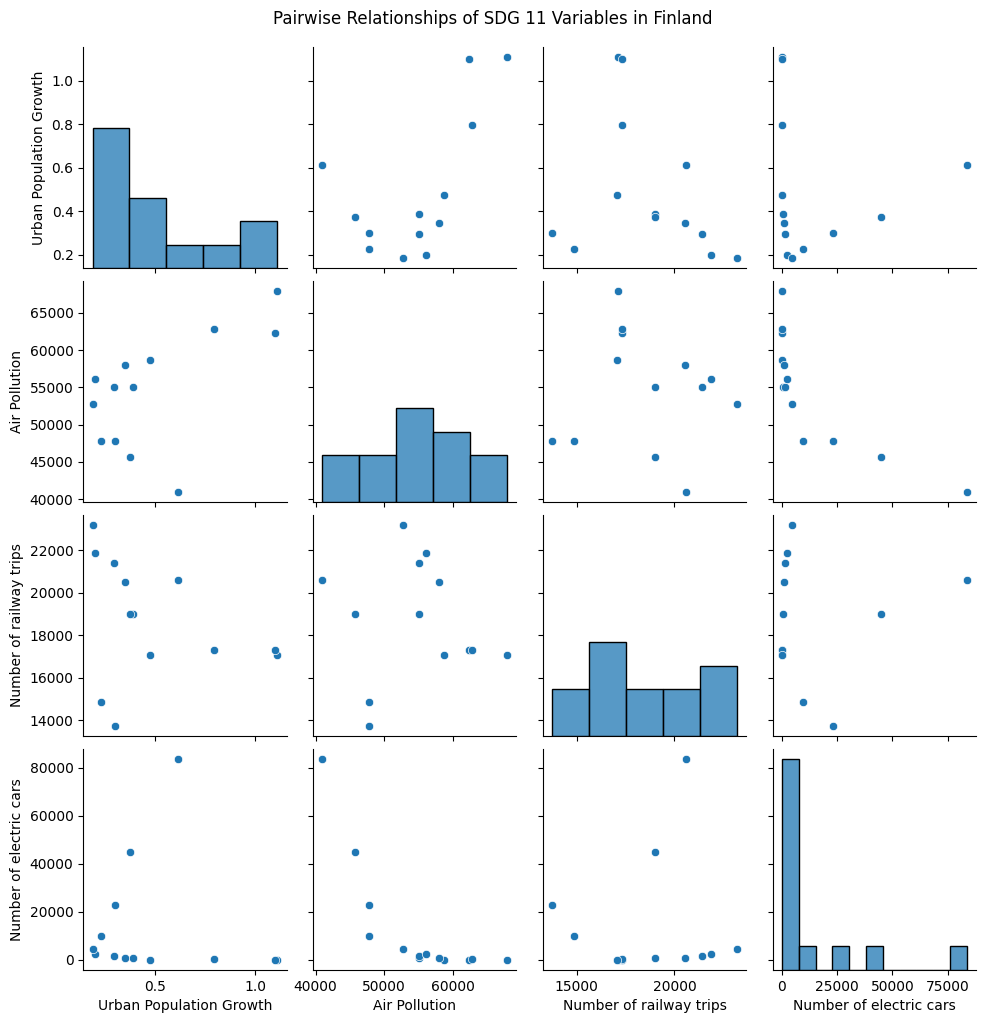

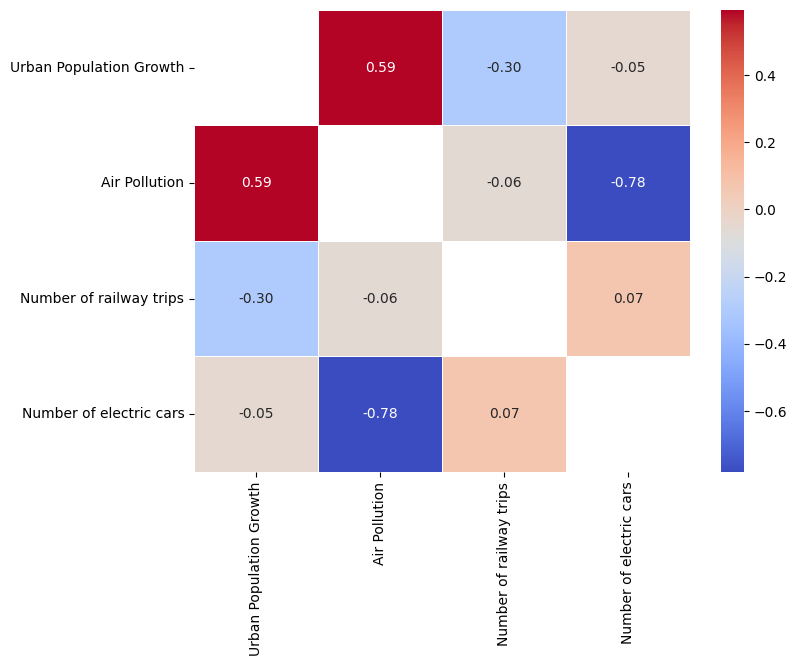

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Yearly Pollution
df_pollution = pd.read_csv("/home/akupalo/informationviz/data/001_138v_2023_20250312-162058.csv")
df_pollution['Vuosi'] = pd.to_datetime(df_pollution['Vuosi'], format='%Y')
df_pollution.set_index('Vuosi', inplace=True)

# Urban Population Growth
df_growth = pd.read_csv("/home/akupalo/informationviz/data/finland-urban-population.csv")
df_growth.columns = df_growth.columns.str.strip()
df_growth['Year'] = pd.to_datetime(df_growth['Year'], format='%Y')
df_growth.set_index('Year', inplace=True)

# Railway Trips
df_rail = pd.read_csv("/home/akupalo/informationviz/data/statfin_rtie_pxt_12ra_20250313_122818.csv")
df_rail.columns = df_rail.columns.str.strip()
df_rail['Year'] = df_rail['Year'].str.extract(r'(\d{4})').astype(int)
df_rail = df_rail.groupby('Year').mean()
df_rail.index = pd.to_datetime(df_rail.index, format='%Y')

# Electric Cars
df_car = pd.read_csv("/home/akupalo/informationviz/data/statfin_mkan_pxt_11ie_20250313_122422.csv")
df_car.columns = df_car.columns.str.strip()
df_car['year'] = pd.to_datetime(df_car['year'], format='%Y', errors='coerce')
df_car.set_index('year', inplace=True)

start_year = "2011"
end_year = "2023"

df_growth = df_growth.loc[start_year:end_year]
df_pollution = df_pollution.loc[start_year:end_year]
df_rail = df_rail.loc[start_year:end_year]
df_car = df_car.loc[start_year:end_year]

# Prepare for visualization
data = pd.DataFrame({
    'Urban Population Growth': df_growth["Annual % Change"],
    'Air Pollution': df_pollution["Paasto tuhatta tonnia CO2-ekv. (GWP=AR5)"],
    'Number of railway trips': df_rail["Passenger rail transport"],
    'Number of electric cars': df_car["Number of electric passenger cars in traffic"]
})

# Drop missing values to avoid visualization errors
data.dropna(inplace=True)

# Pairwise Scatter Plots
sns.pairplot(data)
plt.suptitle("Pairwise Relationships of SDG 11 Variables in Finland", y=1.02)
plt.show()

# Correlation Heatmap
corr_matrix = data.corr()
# Create a mask to hide values where correlation is exactly 1
mask = np.eye(corr_matrix.shape[0], dtype=bool) 

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, mask=mask)
plt.show()


Year
2011-01-01    1.1097
2012-01-01    1.1001
2013-01-01    0.7949
2014-01-01    0.4723
2015-01-01    0.3881
2016-01-01    0.3461
2017-01-01    0.2933
2018-01-01    0.1994
2019-01-01    0.1851
2020-01-01    0.2267
2021-01-01    0.2996
2022-01-01    0.3712
2023-01-01    0.6128
Name: Annual % Change, dtype: float64
Vuosi
2011-01-01    67933
2012-01-01    62305
2013-01-01    62819
2014-01-01    58652
2015-01-01    55076
2016-01-01    57950
2017-01-01    55075
2018-01-01    56123
2019-01-01    52731
2020-01-01    47770
2021-01-01    47797
2022-01-01    45693
2023-01-01    40998
Name: Paasto tuhatta tonnia CO2-ekv. (GWP=AR5), dtype: int64
